## **Importing the libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

import seaborn as sns
sns.set_theme(style="darkgrid", palette="deep")
%matplotlib inline


## **Creating the plots**

In [ ]:
def plot_history(history):
  rewards = history["rewards"]
  cum_rewards = history["cum_rewards"]
  chosen_arms = history["arms"]

  fig = plt.figure(figsize=[30,8])

  ax2 = fig.add_subplot(121)
  ax2.plot(cum_rewards, label="avg rewards")
  ax2.set_title("Cummulative Rewards")

  ax3 = fig.add_subplot(122)
  ax3.bar([i for i in range(len(chosen_arms))], chosen_arms, label="chosen arms")
  ax3.set_title("Chosen Actions")

## **Creating Environment**

In [ ]:
class Env:
    def __init__(self, reward_prob, rewards):
        self.reward_prob = reward_prob
        self.rewards = rewards
        self.k_arms = len(rewards)

    def __str__(self):
        return f"K_arms: {self.k_arms}\nReward Probabilities: {self.reward_prob} Rewards: {self.rewards}"

    def step(self, arm):
        if np.random.random() < self.reward_prob[arm]:
            return self.rewards[arm]
        else:
            return 0.0

## **Instantiating the environment**

In [ ]:
reward_prob = np.array([0.01, 1.0, 0.65, 0.99, 0.65, 1.0])
rewards = np.array([95.0, 0.0, 25.5, 10.05, 5.45, 2.50])

env = Env(reward_prob, rewards)



## **Performing a selective action**

In [ ]:
selected_arm = 0
[env.step(selected_arm) for _ in range(10)]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

## **Balancing Exploration and Exploitation with epsilon greedy algorithm**

In [ ]:
class EpsilonGreedyAgent:
    def __init__(self, env, max_iters=200, eps=(lambda t: 0.1)):
        self.env = env
        self.iters = max_iters
        self.eps = eps


    def act(self):
        q_values = np.zeros(self.env.k_arms)
        arm_rewards = np.zeros(self.env.k_arms)
        arm_counts = np.zeros(self.env.k_arms)
        eps_history = []

        rewards = [0]
        cum_rewards = [0]

        for i in tqdm(range(self.iters)):
            eps_history.append(self.eps(i))

            if np.random.random() < eps_history[-1]:
                arm = np.random.choice(self.env.k_arms)
            else:
                arm = np.argmax(q_values)

            
            reward = self.env.step(arm)

            arm_rewards[arm] += reward
            arm_counts[arm] += 1
            q_values[arm] = arm_rewards[arm] / arm_counts[arm]

            rewards.append(reward)
            cum_rewards.append(sum(rewards) / len(rewards))

        
        plt.plot(eps_history)

        return {
            "rewards": rewards,
            "cum_rewards": cum_rewards,
            "arms": arm_counts
        }


## **Implementing Epsilon greedy algorithm**

100%|██████████| 2000/2000 [00:00<00:00, 7735.09it/s] 


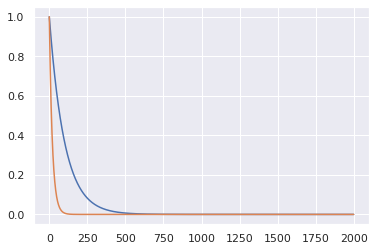

In [ ]:
def decay_eps(t, c=0.01):
    return np.exp(-c * t) # Epsilon decay schedule 

eps_greedy_agent_1 = EpsilonGreedyAgent(env, max_iters=2000, eps=lambda t: decay_eps(t, 0.01))
eps_greedy_agent_2 = EpsilonGreedyAgent(env, max_iters=2000, eps=lambda t: decay_eps(t, 0.05))

history_1 = eps_greedy_agent_1.act()
history_2 = eps_greedy_agent_2.act()


## **Mapping plot for Epsilon greedy algorithm**

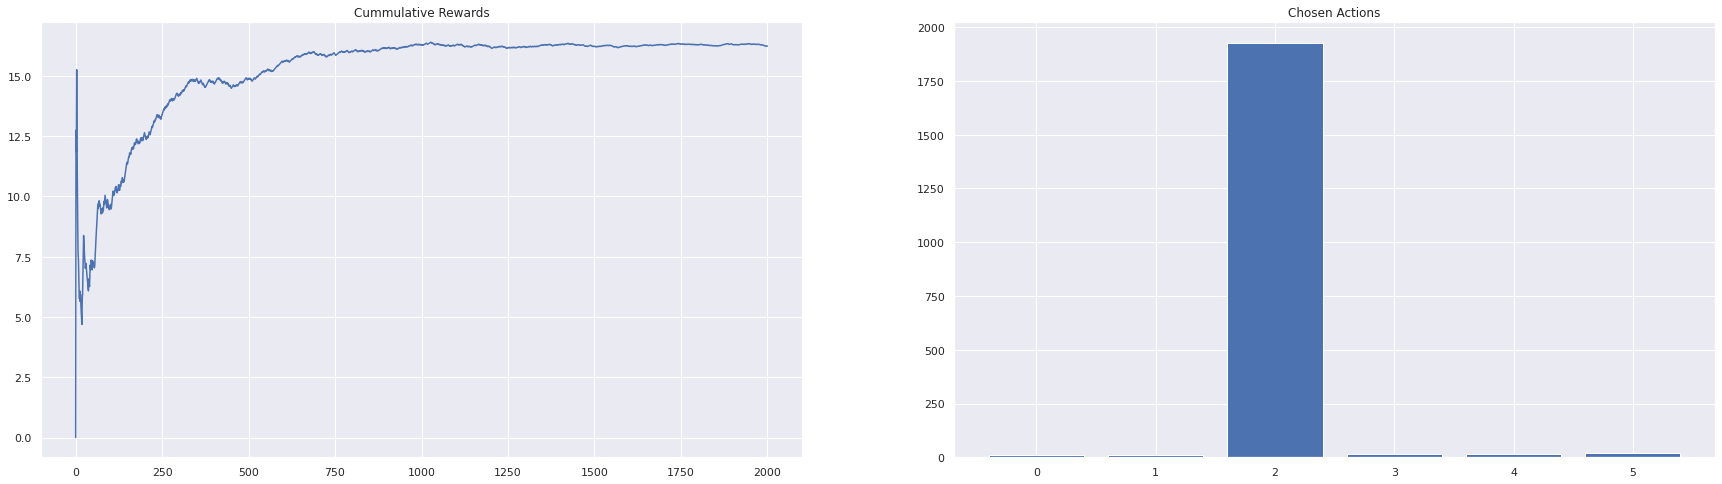

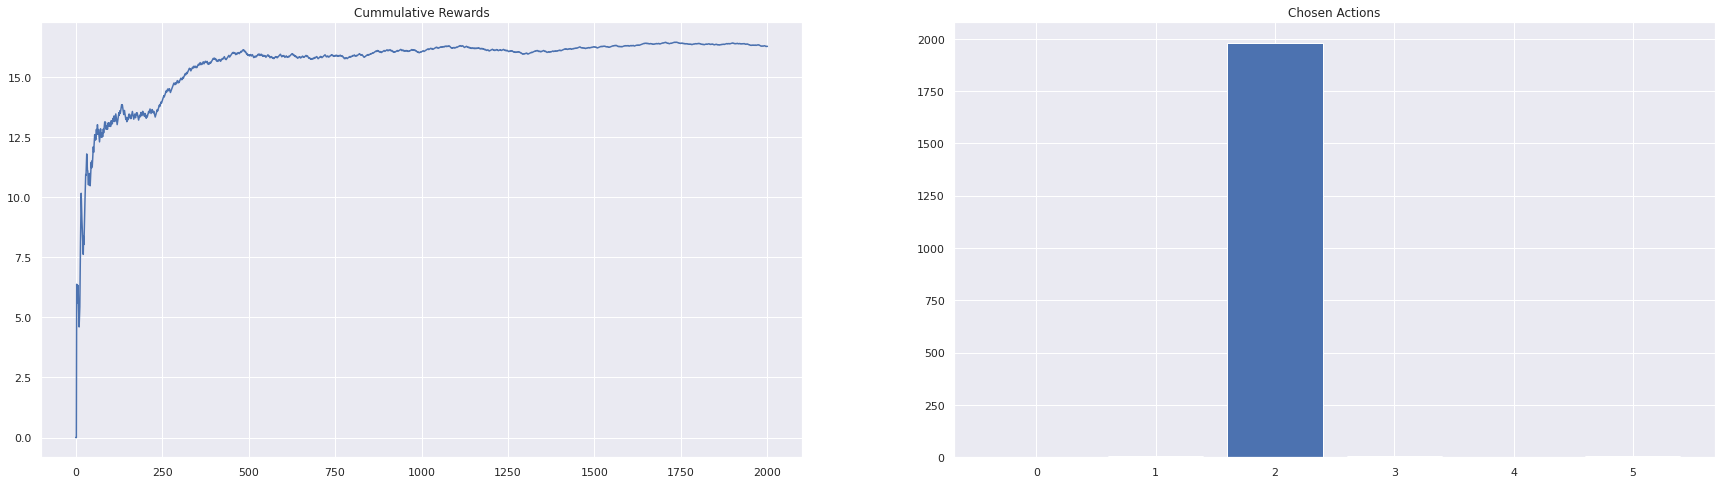

In [ ]:
plot_history(history_1)
plot_history(history_2)